**CÓDIGO 8: Ecuación de Schrodinger Independiente del Tiempo en 2D, Diferencias Finitas: Pozo Cuadrado Infinito.**

In [309]:
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science', 'notebook'])
from scipy import sparse
import plotly.graph_objects as go
import plotly.io as pio

-Construcción del potencial

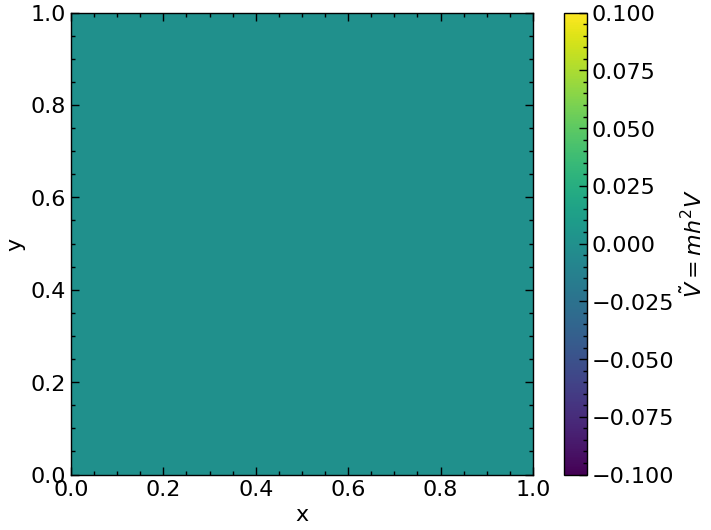

In [ ]:
#Definimos el número de puntos de discretización N y creamos la malla de nodos.

N = 150
L=1
X, Y=np.meshgrid(np.linspace(0,L,N, dtype=float),np.linspace(0,L,N,dtype=float))

#Definimos el vector que discretiza el espacio [0,L]x[0,L]

y=np.linspace(0,L,N+1)
dx = L / (N-1)

#Definimos el potencial Vtilda=mh^2V

def Vtilda(x,y):
    return 0*x

#Graficamos el potencial
V=Vtilda(X,Y)
plt.imshow(V, extent=[0, L, 0, L], origin='lower')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label=r'$\tilde{V} = mh^2 V$')

-Construcción de la matriz hamiltoniana y cálculo de autovectores y autovalores.

In [ ]:
#Construimos la matriz D' a la que operaré con el producto de Kronecker

diag= np.ones([N]) #Vector de 1s repetido dimensión N
diags=np.array([diag,-2*diag,diag]) #Vector de 1s -2s y 1s
D=sparse.spdiags(diags,np.array([-1,0,1]),N,N)/(dx**2)

#La construcción de D' consiste en poner el vector diag en la posición -1 es decir en la diagonal inferior
#0 representa la posición de la diagonal principal (el vector -2*diags se coloca en la principal) y 1 la diagonal superior.
#Una sparse matrix es una matriz donde la mayoría de elementos son nulos y es útil utilizarla para almacenar y operar
#con sistemas grandes de ecuaciones pues sólamente almacenan los elementos no nulos.

#Construcción de la matriz cinética T y energía potencial U

T=-1/2*sparse.kronsum(D,D) #Matriz dispersa de tamaño N^2 x N^"2
U=sparse.diags(V.reshape(N**2),(0)) #Matriz despersa de tamaño N^2 x N^2 que coloca el vector V en la diagonal principal.

H=T+U

#Cálculo de autofunciones y autovalores

autovalores, autovectores = eigsh(H, k=11, which='SM')

#SM indica que se toman los 10 primeros autovalores más pequeños


-Gráfica de las densidades de probabilidad

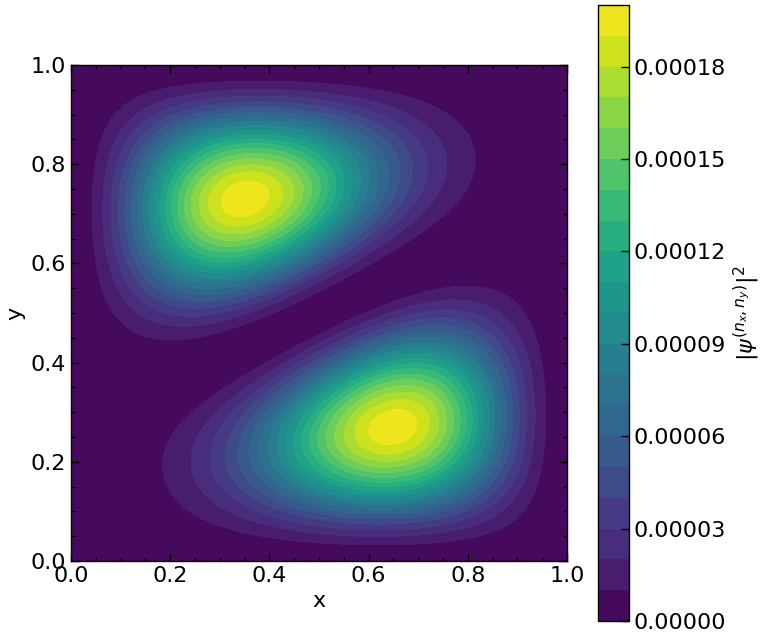

In [312]:
#Construimos una función que me obtenga las autofunciones para graficarlas

def autofunciones(n):
    return autovectores.T[n].reshape((N,N))

#n indica la n-ésima autofunción que buscamos
#los autovectores vienen dados en columnas, por tanto se hace la traspuesta para que estén en filas
#y posteriormente con reshape se vuelve a tener la bidimensionalidad pasando del vector a la matriz

#i es el i-ésimo autovector que se grafica
i=1

plt.figure(figsize=(8,8))
plt.contourf(X,Y,autofunciones(i)**2,20)
plt.gca().set_aspect('equal')
plt.xlabel(r'x')                    
plt.ylabel(r'y') 
plt.colorbar(label=r'$|\psi^{(n_x,n_y)}|^2$')
plt.show()


In [313]:
pio.renderers.default = 'notebook'

# Crear figura de superficie 3D
fig = go.Figure(data=[go.Surface(z=autofunciones(i)**2, x=X, y=Y,colorscale='Viridis',
    colorbar=dict(title=r'|ψₙ|²'))])

# Mostrar figura (interactiva, podrás rotar con el ratón)
fig.show()



-Cálculo de los autovalores/energías propias

Para el caso del pozo infinito cuadrado tenemos que los autovalores vienen dados por $E_{n_x,n_y}=\alpha(n_x^2+n_y^2)$. La primera energía que obtenemos es por tanto cuando $n_x=1$ y $n_y=1$. Por tanto $\alpha$ es la mitad del autovalor más pequeño y se puede plotear $E/\alpha$ que se distribuye como $n_x^2+n_y^2$ para diferentes combinaciones de $n_x$ y $n_y$. Es decir, realmente estamos normalizando y el análisis se centra en la estructura del espectro y vemos como la energía crece o decrece en función de los números cuánticos.
Esto es porque conocemos como son los autovalores.

In [314]:
hbar_c = 197.3269804  # eV·nm
m_e = 511000.0        # eV/c^2
conv_factor = (hbar_c**2) / m_e
autovalores_ev = autovalores * conv_factor

# Mostrar resultados
print("Autovalores obtenidos (los 11 más bajos) en eV:")
for i, val in enumerate(autovalores_ev, start=1):
    print(f"  E{i} = {val:.6f} eV")

Autovalores obtenidos (los 11 más bajos) en eV:
  E1 = 0.732242 eV
  E2 = 1.830447 eV
  E3 = 1.830447 eV
  E4 = 2.928652 eV
  E5 = 3.660260 eV
  E6 = 3.660260 eV
  E7 = 4.758465 eV
  E8 = 4.758465 eV
  E9 = 6.220890 eV
  E10 = 6.220890 eV
  E11 = 6.588278 eV


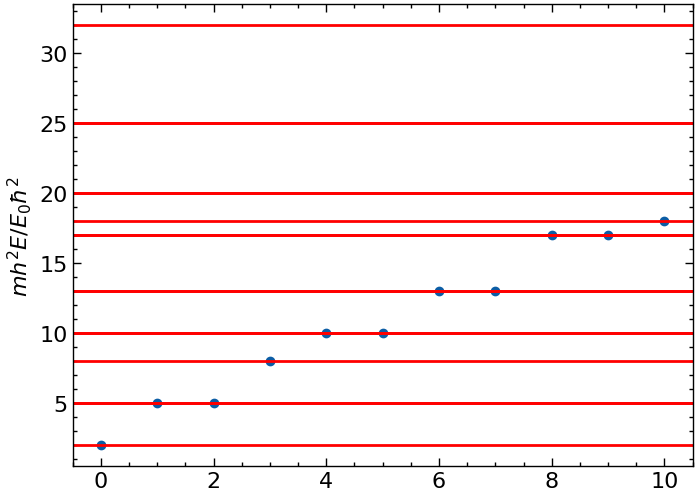

In [315]:
alpha = autovalores[0]/2
E_div_alpha = autovalores/alpha #he normalizado los autovalores
indices = np.arange(0, len(autovalores), 1)
plt.ylabel(r'$mh^2E/E_{0}\hbar^2$')
plt.scatter(indices, E_div_alpha)
[plt.axhline(nx**2 + ny**2,color='r') for nx in range(1,5) for ny in range(1,5)]
plt.show()



Primeros 10 autovalores:
 1) nx=1, ny=1  ->  E = 0.7523 eV
 2) nx=1, ny=2  ->  E = 1.8806 eV
 3) nx=2, ny=1  ->  E = 1.8806 eV
 4) nx=2, ny=2  ->  E = 3.0090 eV
 5) nx=1, ny=3  ->  E = 3.7613 eV
 6) nx=3, ny=1  ->  E = 3.7613 eV
 7) nx=2, ny=3  ->  E = 4.8896 eV
 8) nx=3, ny=2  ->  E = 4.8896 eV
 9) nx=1, ny=4  ->  E = 6.3941 eV
10) nx=4, ny=1  ->  E = 6.3941 eV


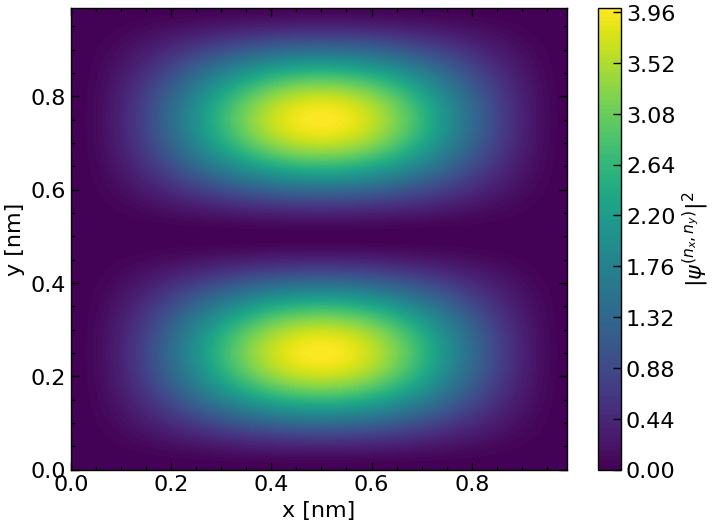

In [316]:

# Parámetros del pozo
a = 1   # nm (longitud en x)
b = 1   # nm (longitud en y)

# Constantes
hc = 1240      # eV*nm
m = 511000     # eV/c^2 (masa del electrón en eV)

pi = np.pi

# Función para calcular energía de un estado (nx, ny)
def energia(nx, ny, a, b, m, hc):
    Ex = nx**2 * hc**2 / (8 * m * a**2)
    Ey = ny**2 * hc**2 / (8 * m * b**2)
    return Ex + Ey

# Calcular autovalores para varios nx, ny
niveles = []
n_max = 5   # hasta nx,ny = 5 debería bastar para obtener los primeros 10
for nx in range(1, n_max+1):
    for ny in range(1, n_max+1):
        E = energia(nx, ny, a, b, m, hc)
        niveles.append(((nx, ny), E))

# Ordenar por energía
niveles.sort(key=lambda x: x[1])

# Mostrar los primeros 10
print("Primeros 10 autovalores:")
for i, ((nx, ny), E) in enumerate(niveles[:10], start=1):
    print(f"{i:2d}) nx={nx}, ny={ny}  ->  E = {E:.4f} eV")

# Ahora ejemplo para un estado concreto (nx=1, ny=2)
nx, ny = 1, 2
E = energia(nx, ny, a, b, m, hc)

# Malla espacial
x = np.arange(0, a, 0.01)
y = np.arange(0, b, 0.01)
xp, yp = np.meshgrid(x, y)

# Autofunción (normalizada)
psi = (2 / np.sqrt(a * b)) * np.sin(nx * pi * xp / a) * np.sin(ny * pi * yp / b)

# Densidad de probabilidad
rho = psi**2

# Gráfica
plt.contourf(xp, yp, rho, levels=100, cmap="viridis")
plt.colorbar(label=r'$|\psi^{(n_x,n_y)}|^2$')
plt.xlabel("x [nm]")
plt.ylabel("y [nm]")
plt.show()

